In [115]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from time import time

In [117]:
def bubble_sort(x):
    arr = x.copy()
    for j in range(len(arr)):
        for i,_ in enumerate(arr[:-(j+1)]):
            if arr[i]>arr[i+1]:
                arr[i],arr[i+1] = arr[i+1],arr[i]
    return arr

def split_sort(x):
    arr = x.copy()
    lower = []
    higher = []
    mean = sum(arr)/len(arr)
    
    for i in arr:
        if i>=mean:
            higher.append(i)
            
        else:
            lower.append(i)
            
    return bubble_sort(lower) + bubble_sort(higher) 

def initFig():
    fig = plt.figure(constrained_layout=True, figsize=(12,4))
    
    gs = GridSpec(2,3,figure=fig)
    ax = [fig.add_subplot(gs[0,0]),
         fig.add_subplot(gs[1,0]),
         fig.add_subplot(gs[:,1:])]
    
    return fig, ax


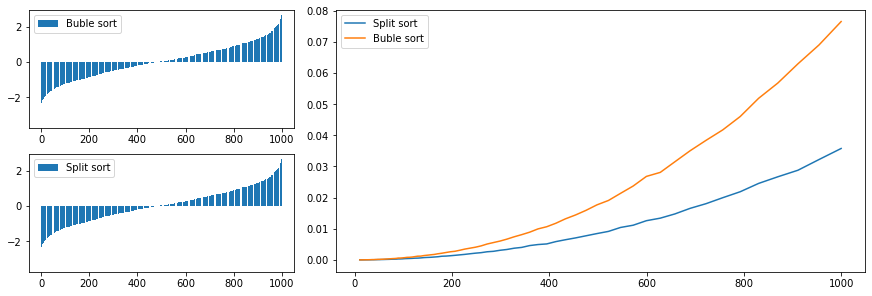

In [128]:
fig, ax = initFig()

sizes = np.logspace(1,3,100)

split_time_list = []
buble_time_list = []

for size in sizes:
    values_list = list(np.random.randn(int(size)))
    
    split_time = time()
    split_values_list = split_sort(values_list)
    split_time_list.append(time() - split_time)
    
    buble_time = time()
    bubble_values_list = bubble_sort(values_list)
    buble_time_list.append(time() - buble_time)
    

ax[0].bar(range(len(bubble_values_list)),bubble_values_list,label="Buble sort")


ax[1].bar(range(len(split_values_list)),split_values_list,label="Split sort")
ax[1]

ax[2].plot(list(sizes),split_time_list,label="Split sort")
ax[2].plot(list(sizes),buble_time_list,label="Buble sort")

[i.legend() for i in ax];
